In [13]:
import pandas as pd
import os

# 각 파일의 칼럼 확인
files = [
    "olist_customers_dataset.csv", 
    "olist_geolocation_dataset.csv",
    "olist_order_items_dataset.csv",
    "olist_order_payments_dataset.csv",
    "olist_order_reviews_dataset.csv",
    "olist_orders_dataset.csv",
    "olist_products_dataset.csv",
    "olist_sellers_dataset.csv",
    "product_category_name_translation.csv",
]

columns_dict = {}
for f in files:
    df = pd.read_csv(f, nrows=0)
    columns_dict[f] = df.columns.tolist()

for fname, cols in columns_dict.items():
    print(f"{fname}: {cols}")


# 각 파일의 이상치 + 결측치 제거 후 저장(후에 정제된 데이터만 활용하기 위해...)
# olist_customers_dataset.csv 정제
# 1. 원본 데이터 로드
customers = pd.read_csv("olist_customers_dataset.csv")
# 2. ZIP prefix를 문자열(str)로 변환 + 5자리 맞춰 앞자리 0 채움
customers["customer_zip_code_prefix"] = customers["customer_zip_code_prefix"].astype(str).str.zfill(5)
# 3. 클린 버전 CSV로 저장
customers.to_csv("clean_customers.csv", index=False)
print("✅ clean_customers.csv 저장 완료 (ZIP 문자열 처리 포함)")

olist_customers_dataset.csv: ['customer_id', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']
olist_geolocation_dataset.csv: ['geolocation_zip_code_prefix', 'geolocation_lat', 'geolocation_lng', 'geolocation_city', 'geolocation_state']
olist_order_items_dataset.csv: ['order_id', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value']
olist_order_payments_dataset.csv: ['order_id', 'payment_sequential', 'payment_type', 'payment_installments', 'payment_value']
olist_order_reviews_dataset.csv: ['review_id', 'order_id', 'review_score', 'review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp']
olist_orders_dataset.csv: ['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']
olist_products_dataset.csv: ['product_id', 'product_category_name', 'pro

In [14]:
# olist_geolocation_dataset.csv 정제
# 1. 파일 불러오기
df = pd.read_csv("olist_geolocation_dataset.csv")
# 2. 결측치 제거
df = df.dropna()
# 3. 이상치 기준: 브라질의 위도 (-34 ~ 5), 경도 (-74 ~ -34)
condition = (
    (df['geolocation_lat'] >= -34) & (df['geolocation_lat'] <= 5) &
    (df['geolocation_lng'] >= -74) & (df['geolocation_lng'] <= -34)
)
df_clean = df[condition].copy()
# 4. 정제된 데이터 저장
df_clean.to_csv("clean_geolocation.csv", index=False)
print("✅ 이상치 및 결측치 제거 완료! → clean_geolocation.csv 저장됨")


✅ 이상치 및 결측치 제거 완료! → clean_geolocation.csv 저장됨


In [15]:
# olist_order_items_dataset.csv 정제
# 데이터 불러오기
df = pd.read_csv("olist_order_items_dataset.csv")

# 결측치 확인
print("📌 결측치 현황:\n", df.isnull().sum())

# ③ 이상치 범위만 계산해서 출력 (price, freight_value)
def show_outlier_bounds(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    print(f"🔍 '{column}' 이상치 기준: < {lower:.2f} 또는 > {upper:.2f}")

show_outlier_bounds("price")
show_outlier_bounds("freight_value")

# 정제하지 않고 그대로 저장
df.to_csv("clean_order_items_dataset.csv", index=False)
print("✅ 저장 완료: clean_order_items_dataset.csv (원본 그대로)")

📌 결측치 현황:
 order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64
🔍 'price' 이상치 기준: < -102.60 또는 > 277.40
🔍 'freight_value' 이상치 기준: < 0.98 또는 > 33.25
✅ 저장 완료: clean_order_items_dataset.csv (원본 그대로)


In [16]:
# olist_order_items_dataset.csv 정제
# 1. 데이터 불러오기
df = pd.read_csv("olist_order_payments_dataset.csv")

# 2. 결측치 확인
print("📌 결측치 확인")
print(df.isnull().sum())

# 3. 이상치 기준 계산 (IQR)
Q1 = df[["payment_installments", "payment_value"]].quantile(0.25)
Q3 = df[["payment_installments", "payment_value"]].quantile(0.75)
IQR = Q3 - Q1
print("📌 Q1 (25% 분위수):\n", Q1)
print("\n📌 Q3 (75% 분위수):\n", Q3)
print("\n📌 IQR (Q3 - Q1):\n", IQR)

# 정제하지 않고 그대로 저장
df.to_csv("clean_order_payments_dataset.csv", index=False)
print("✅ 저장 완료: clean_order_payments_dataset.csv (원본 그대로)")

📌 결측치 확인
order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64
📌 Q1 (25% 분위수):
 payment_installments     1.00
payment_value           56.79
Name: 0.25, dtype: float64

📌 Q3 (75% 분위수):
 payment_installments      4.0000
payment_value           171.8375
Name: 0.75, dtype: float64

📌 IQR (Q3 - Q1):
 payment_installments      3.0000
payment_value           115.0475
dtype: float64
✅ 저장 완료: clean_order_payments_dataset.csv (원본 그대로)


In [17]:
# olist_order_reviews_dataset.csv 정제
# 1. 데이터 불러오기
df = pd.read_csv("olist_order_reviews_dataset.csv")

# 2. 결측치 확인
print("📌 결측치 확인:")
print(df.isnull().sum())

# 3. 데이터 타입 및 스코어 이상치 확인
print("\n📌 review_score 통계 요약:")
print(df["review_score"].describe())

# review_score는 1~5 범위로 고정 → 이상치 없음
# 텍스트 리뷰는 결측치 많음 (자유 입력식이므로 제거 X)

# 4. 클린 데이터 저장 (결측치 제거 없이 저장)
df.to_csv("clean_order_reviews_dataset.csv", index=False)
print("\n✅ 이상치 없음 / 결측치 허용 → clean_order_reviews_dataset.csv 로 저장 완료")

📌 결측치 확인:
review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

📌 review_score 통계 요약:
count    99224.000000
mean         4.086421
std          1.347579
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

✅ 이상치 없음 / 결측치 허용 → clean_order_reviews_dataset.csv 로 저장 완료


In [21]:
# olist_orders_dataset.csv 정제
df = pd.read_csv("olist_orders_dataset.csv")

# 2. order_approved_at이 결측인 행만 추출
missing_approved = df[df["order_approved_at"].isnull()]

# 3. 이들이 어떤 상태인지 확인 (예: order_status 분포)
summary = missing_approved["order_status"].value_counts().reset_index()
summary.columns = ["order_status", "count"]

# 4. 결과 출력
print("📌 [order_approved_at 결측치 - 주문 상태별 현황]")
print(summary)
# delivered 14 건도 order_approved_at가 결측치 이므로 모두 제거

# order_delivered_carrier_date와 order_delivered_customer_date 결측치 확인
# 2. 결측치 필터링
missing_carrier = df[df["order_delivered_carrier_date"].isnull()]
missing_customer = df[df["order_delivered_customer_date"].isnull()]

# 3. 결측치 분포 (order_status 기준)
carrier_status_summary = missing_carrier["order_status"].value_counts().reset_index()
carrier_status_summary.columns = ["order_status", "missing_carrier_count"]

customer_status_summary = missing_customer["order_status"].value_counts().reset_index()
customer_status_summary.columns = ["order_status", "missing_customer_count"]

# 4. 결과 출력
print("📦 [order_delivered_carrier_date 결측치 - 상태별 분포]")
print(carrier_status_summary)

print("\n🚚 [order_delivered_customer_date 결측치 - 상태별 분포]")
print(customer_status_summary)

# 확인한 데이터 정제하는 코드
# 데이터 불러오기
df = pd.read_csv("olist_orders_dataset.csv")

# 세 컬럼 중 하나라도 결측이면 제거
df_clean = df.dropna(subset=[
    "order_approved_at",
    "order_delivered_carrier_date",
    "order_delivered_customer_date"
])

# 결과 저장
df_clean.to_csv("clean_olist_orders_dataset.csv", index=False)

# 확인용 출력 (제거된 건수)
removed_count = len(df) - len(df_clean)
print(f"제거된 행 수: {removed_count}건")
print(f"정제 후 데이터 건수: {len(df_clean)}건")

📌 [order_approved_at 결측치 - 주문 상태별 현황]
  order_status  count
0     canceled    141
1    delivered     14
2      created      5
📦 [order_delivered_carrier_date 결측치 - 상태별 분포]
  order_status  missing_carrier_count
0  unavailable                    609
1     canceled                    550
2     invoiced                    314
3   processing                    301
4      created                      5
5     approved                      2
6    delivered                      2

🚚 [order_delivered_customer_date 결측치 - 상태별 분포]
  order_status  missing_customer_count
0      shipped                    1107
1     canceled                     619
2  unavailable                     609
3     invoiced                     314
4   processing                     301
5    delivered                       8
6      created                       5
7     approved                       2
제거된 행 수: 2980건
정제 후 데이터 건수: 96461건


In [ ]:
import pandas as pd
from scipy.stats import zscore

# ✅ 1. CSV 불러오기 (로컬 기준으로 경로 수정)
df = pd.read_csv("clean_olist_orders_dataset.csv")

# ✅ 2. 날짜형 컬럼 변환
df["order_delivered_customer_date"] = pd.to_datetime(df["order_delivered_customer_date"])
df["order_purchase_timestamp"] = pd.to_datetime(df["order_purchase_timestamp"])

# ✅ 3. 파생 변수 생성 (배송 일수)
df["days_to_deliver"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days

# ✅ 4. IQR 기준 계산
q1 = df["days_to_deliver"].quantile(0.25)
q3 = df["days_to_deliver"].quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
iqr_outliers = df[(df["days_to_deliver"] < iqr_lower) | (df["days_to_deliver"] > iqr_upper)]

# ✅ 5. Z-score 기준 계산
df["z_score_days_to_deliver"] = zscore(df["days_to_deliver"])
z_outliers = df[abs(df["z_score_days_to_deliver"]) > 3]

# ✅ 6. 결과 출력
print("📌 IQR 기준")
print(f"- Q1: {q1}, Q3: {q3}, IQR: {iqr}")
print(f"- Lower Bound: {iqr_lower}, Upper Bound: {iqr_upper}")
print(f"- 이상치 수: {len(iqr_outliers)}")

print("\n📌 Z-score 기준")
print(f"- 이상치 수: {len(z_outliers)}")

# IQR 기준, Z-score 확인하였으나 세부 데이터 확인 결과 도메인 기반 기준(비즈니스 규칙)으로 이상치 정제하는 것으로 결정

📌 IQR 기준
- Q1: 6.0, Q3: 15.0, IQR: 9.0
- Lower Bound: -7.5, Upper Bound: 28.5
- 이상치 수: 5024

📌 Z-score 기준
- 이상치 수: 1613


In [ ]:
# 도메인 기반 기준(비즈니스 규칙-clean_olist_orders_dataset)에서 days_to_approve는 10일 까지만 days_to_deliver는 0일 이하 or 60일 이상 제거, 
# days_late는 -30일 ~ +30일 까지만으로 이상치 정제

# 1차 정제된 데이터 불러오기
df = pd.read_csv("clean_olist_orders_dataset.csv", parse_dates=[
    "order_purchase_timestamp",
    "order_approved_at",
    "order_delivered_customer_date",
    "order_estimated_delivery_date"
])

# 📌 파생 컬럼 생성
df["days_to_approve"] = (df["order_approved_at"] - df["order_purchase_timestamp"]).dt.days
df["days_to_deliver"] = (df["order_delivered_customer_date"] - df["order_purchase_timestamp"]).dt.days
df["days_late"] = (df["order_delivered_customer_date"] - df["order_estimated_delivery_date"]).dt.days

# ✅ 이상치 제거 기준 적용
condition_approve = df["days_to_approve"] <= 10
condition_deliver = (df["days_to_deliver"] > 0) & (df["days_to_deliver"] <= 60)
condition_late = df["days_late"].between(-30, 30)

# 🔍 이상치 제거
filtered_df = df[condition_approve & condition_deliver & condition_late]

# 💾 정제된 결과 저장
filtered_df.to_csv("clean_orders_dataset.csv", index=False)

# ✅ 결과 출력
print(f"정제 완료! 남은 데이터 수: {filtered_df.shape[0]}건 → clean_orders_dataset.csv 로 저장됨.")

정제 완료! 남은 데이터 수: 93683건 → clean_orders_dataset.csv 로 저장됨.


In [ ]:
# o# olist_sellers_dataset.csv 정제

import pandas as pd

# 데이터 불러오기
df = pd.read_csv("olist_products_dataset.csv")

### 📌 1. 결측치 확인
print("📌 결측치 현황:\n")
missing = df.isnull().sum()
missing = missing[missing > 0]
for col, count in missing.items():
    print(f"🔸 {col}: {count}건")

### 📌 2. 이상치 탐지 (IQR 기준)
print("\n📌 이상치 탐지 결과 (IQR 기준):\n")

def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Outlier Count": outliers.shape[0],
        "Min": data[column].min(),
        "Max": data[column].max()
    }

# 이상치 확인 대상 컬럼 목록
target_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

# 컬럼별 이상치 출력
for col in target_cols:
    print(f"\n🔹 {col}")
    outlier_info = detect_outliers_iqr(df, col)
    for key, value in outlier_info.items():
        print(f"{key}: {value}")

### ✅ 3. 정제 결과 저장
df.to_csv("clean_products_dataset.csv", index=False)
print("\n✅ 정제 검토 결과 저장 완료 → clean_products_dataset.csv")

📌 결측치 현황:

🔸 product_category_name: 610건
🔸 product_name_lenght: 610건
🔸 product_description_lenght: 610건
🔸 product_photos_qty: 610건
🔸 product_weight_g: 2건
🔸 product_length_cm: 2건
🔸 product_height_cm: 2건
🔸 product_width_cm: 2건

📌 이상치 탐지 결과 (IQR 기준):


🔹 product_name_lenght
Q1: 42.0
Q3: 57.0
IQR: 15.0
Lower Bound: 19.5
Upper Bound: 79.5
Outlier Count: 290
Min: 5.0
Max: 76.0

🔹 product_description_lenght
Q1: 339.0
Q3: 972.0
IQR: 633.0
Lower Bound: -610.5
Upper Bound: 1921.5
Outlier Count: 2078
Min: 4.0
Max: 3992.0

🔹 product_photos_qty
Q1: 1.0
Q3: 3.0
IQR: 2.0
Lower Bound: -2.0
Upper Bound: 6.0
Outlier Count: 849
Min: 1.0
Max: 20.0

🔹 product_weight_g
Q1: 300.0
Q3: 1900.0
IQR: 1600.0
Lower Bound: -2100.0
Upper Bound: 4300.0
Outlier Count: 4551
Min: 0.0
Max: 40425.0

🔹 product_length_cm
Q1: 18.0
Q3: 38.0
IQR: 20.0
Lower Bound: -12.0
Upper Bound: 68.0
Outlier Count: 1380
Min: 7.0
Max: 105.0

🔹 product_height_cm
Q1: 8.0
Q3: 21.0
IQR: 13.0
Lower Bound: -11.5
Upper Bound: 40.5
Outlier Count: 18

In [2]:
# 결과값에 대한 Text 파일로 받아서 제대로 확인하기!
# 데이터 불러오기
df = pd.read_csv("olist_products_dataset.csv")

# 결과 저장용 리스트
results = []

### 📌 1. 결측치 확인
results.append("📌 결측치 현황:\n")
missing = df.isnull().sum()
missing = missing[missing > 0]
for col, count in missing.items():
    results.append(f"🔸 {col}: {count}건")

### 📌 2. 이상치 탐지 (IQR 기준)
results.append("\n📌 이상치 탐지 결과 (IQR 기준):\n")

def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Outlier Count": outliers.shape[0],
        "Min": data[column].min(),
        "Max": data[column].max()
    }

# 대상 컬럼
target_cols = [
    "product_name_lenght",
    "product_description_lenght",
    "product_photos_qty",
    "product_weight_g",
    "product_length_cm",
    "product_height_cm",
    "product_width_cm"
]

for col in target_cols:
    results.append(f"\n🔹 {col}")
    info = detect_outliers_iqr(df, col)
    for k, v in info.items():
        results.append(f"{k}: {v}")

# 결과를 텍스트 파일로 저장
with open("outlier_report.txt", "w", encoding="utf-8") as f:
    for line in results:
        f.write(line + "\n")

print("✅ 이상치 및 결측치 분석 결과를 'outlier_report.txt'로 저장했습니다.")


✅ 이상치 및 결측치 분석 결과를 'outlier_report.txt'로 저장했습니다.


In [4]:
# olist_sellers_dataset 정제

# 📁 1. 데이터 불러오기
df = pd.read_csv("olist_sellers_dataset.csv")

# 📌 2. 결측치 확인
print("📌 결측치 현황:\n")
missing = df.isnull().sum()
missing = missing[missing > 0]
if missing.empty:
    print("✅ 결측치 없음")
else:
    for col, count in missing.items():
        print(f"🔸 {col}: {count}건")

# 📌 3. 이상치 확인 대상 컬럼 목록
target_cols = ["seller_zip_code_prefix"]

# 📌 4. 이상치 탐지 함수 (IQR 기준)
def detect_outliers_iqr(data, column):
    q1 = data[column].quantile(0.25)
    q3 = data[column].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5 * iqr
    upper = q3 + 1.5 * iqr
    outliers = data[(data[column] < lower) | (data[column] > upper)]
    return {
        "Q1": q1,
        "Q3": q3,
        "IQR": iqr,
        "Lower Bound": lower,
        "Upper Bound": upper,
        "Outlier Count": outliers.shape[0],
        "Min": data[column].min(),
        "Max": data[column].max()
    }

# 📌 5. 이상치 출력
print("\n📌 이상치 탐지 결과 (IQR 기준):\n")
for col in target_cols:
    print(f"\n🔹 {col}")
    result = detect_outliers_iqr(df, col)
    for key, value in result.items():
        print(f"{key}: {value}")

# ✅ 6. 파일 저장 (정제 필요 없음, 그대로 저장)
df.to_csv("clean_sellers_dataset.csv", index=False)
print("\n📁 'clean_sellers_dataset.csv'로 저장 완료")

📌 결측치 현황:

✅ 결측치 없음

📌 이상치 탐지 결과 (IQR 기준):


🔹 seller_zip_code_prefix
Q1: 7093.5
Q3: 64552.5
IQR: 57459.0
Lower Bound: -79095.0
Upper Bound: 150741.0
Outlier Count: 0
Min: 1001
Max: 99730

📁 'clean_sellers_dataset.csv'로 저장 완료


In [ ]:
# product_category_name_translation 정제

# 데이터 불러오기
df = pd.read_csv("product_category_name_translation.csv")

### 📌 1. 결측치 확인
print("📌 결측치 현황:\n")
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("✅ 결측치 없음")
else:
    for col, count in missing.items():
        print(f"🔸 {col}: {count}건")

### 📌 2. 이상치 탐지 (IQR 기준)
# 문자열만 존재하므로 수치형 이상치 탐지 대상 없음
print("\n📌 이상치 탐지:\n")
print("⚠️ 수치형 컬럼이 없어 이상치 탐지 생략됨.")

### 📁 클린 파일 저장
df.to_csv("clean_product_category_name_translation.csv", index=False)
print("\n✅ 파일 저장 완료: clean_product_category_name_translation.csv")

📌 결측치 현황:

✅ 결측치 없음

📌 이상치 탐지:

⚠️ 수치형 컬럼이 없어 이상치 탐지 생략됨.

✅ 파일 저장 완료: clean_product_category_name_translation.csv


In [6]:
# 정제된 Data 기준 RFM 분석을 위한 데이터 병합

# 1. CSV 불러오기
orders = pd.read_csv("clean_orders_dataset.csv", parse_dates=["order_purchase_timestamp"])
order_items = pd.read_csv("clean_order_items_dataset.csv")
customers = pd.read_csv("clean_customers.csv")

# 2. 주문 + 주문아이템 병합 (order_id 기준)
merged = pd.merge(orders, order_items, on="order_id", how="inner")

# 3. 위 결과에 고객 정보 병합 (customer_id 기준)
rfm_df = pd.merge(merged, customers, on="customer_id", how="inner")

# 4. 결과 확인
print(f"✅ 병합된 RFM 대상 데이터 shape: {rfm_df.shape}")
print(f"📌 컬럼 목록:\n{rfm_df.columns.tolist()}")

# 5. 저장 (선택)
rfm_df.to_csv("rfm_base_dataset.csv", index=False)

✅ 병합된 RFM 대상 데이터 shape: (106877, 21)
📌 컬럼 목록:
['order_id', 'customer_id', 'order_status', 'order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date', 'days_to_approve', 'days_to_deliver', 'days_late', 'order_item_id', 'product_id', 'seller_id', 'shipping_limit_date', 'price', 'freight_value', 'customer_unique_id', 'customer_zip_code_prefix', 'customer_city', 'customer_state']


In [7]:
# 병합한 "rfm_base_dataset.csv" 기준으로 RFM 계산
# Recency: 마지막 구매일로부터 기준일까지 며칠 지났는지
# Frequency: 고객이 구매한 횟수
# Monetary: 총 구매 금액

import pandas as pd
import datetime as dt

# 1. 데이터 불러오기
df = pd.read_csv("rfm_base_dataset.csv", parse_dates=["order_purchase_timestamp"])

# 2. 기준 날짜 설정 (분석 시점 기준으로 가장 마지막 구매일 + 1일)
reference_date = df["order_purchase_timestamp"].max() + pd.Timedelta(days=1)

# 3. RFM 계산
rfm = df.groupby("customer_id").agg({
    "order_purchase_timestamp": lambda x: (reference_date - x.max()).days,  # Recency
    "order_id": "nunique",        # Frequency
    "price": "sum"                # Monetary
}).reset_index()

# 4. 컬럼명 변경
rfm.columns = ["customer_id", "Recency", "Frequency", "Monetary"]

# 5. RFM 점수화 (1~5점, 5가 가장 우수)
rfm["R_score"] = pd.qcut(rfm["Recency"], 5, labels=[5,4,3,2,1]).astype(int)  # 낮을수록 좋음
rfm["F_score"] = pd.qcut(rfm["Frequency"].rank(method='first'), 5, labels=[1,2,3,4,5]).astype(int)  # 높을수록 좋음
rfm["M_score"] = pd.qcut(rfm["Monetary"], 5, labels=[1,2,3,4,5]).astype(int)  # 높을수록 좋음

# 6. RFM 통합 점수
rfm["RFM_score"] = rfm["R_score"].astype(str) + rfm["F_score"].astype(str) + rfm["M_score"].astype(str)

# 7. 결과 확인
print(rfm.head())

# 8. 저장
rfm.to_csv("rfm_scores.csv", index=False)

                        customer_id  Recency  Frequency  Monetary  R_score  \
0  00012a2ce6f8dcda20d059ce98491703      288          1     89.80        2   
1  000161a058600d5901f007fab4c27140      410          1     54.90        1   
2  0001fd6190edaaf884bcaf3d49edf079      548          1    179.99        1   
3  0002414f95344307404f0ace7a26f1d5      379          1    149.90        2   
4  000379cdec625522490c315e70c7a9fb      150          1     93.00        4   

   F_score  M_score RFM_score  
0        1        3       213  
1        1        2       112  
2        1        5       115  
3        1        4       214  
4        1        3       413  


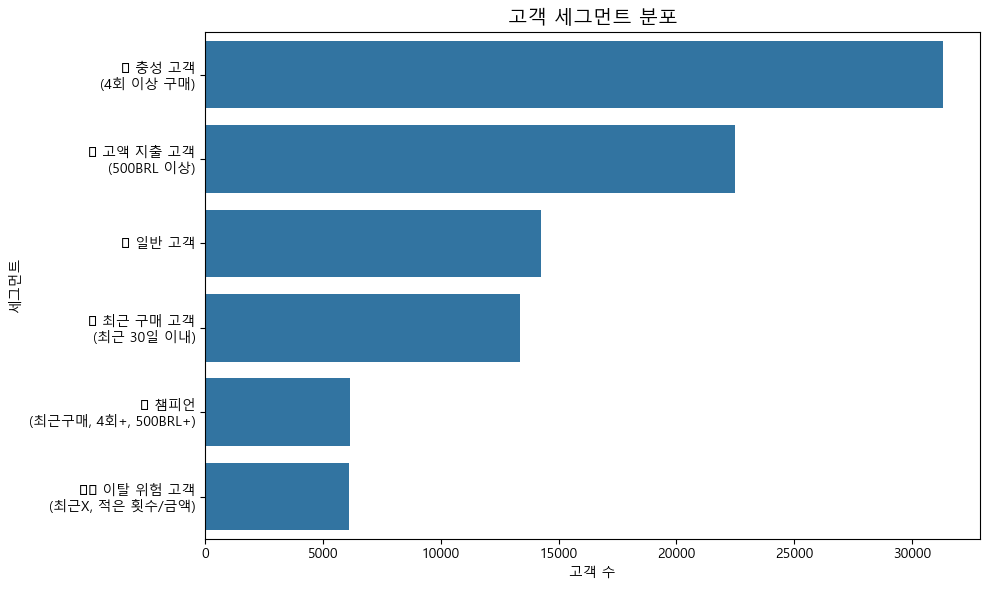


📌 세그먼트별 고객 수:

                      세그먼트 (조건)   고객 수
0           🤝 충성 고객\n(4회 이상 구매)  31314
1       💸 고액 지출 고객\n(500BRL 이상)  22481
2                       📦 일반 고객  14244
3       🆕 최근 구매 고객\n(최근 30일 이내)  13375
4   🏆 챔피언\n(최근구매, 4회+, 500BRL+)   6159
5  ⚠️ 이탈 위험 고객\n(최근X, 적은 횟수/금액)   6110


In [ ]:
# 고객 세그먼트 분석(점수화 + 시각화)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import warnings

# ✅ 한글 폰트 설정 (예: 나눔고딕)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


# 📌 RFM 점수화된 결과 불러오기
rfm = pd.read_csv("rfm_segmented.csv")  # 앞서 저장했던 RFM 점수 결과 파일

# ✅ 한글 세그먼트 정의 함수 (구체 조건 포함)
def classify_segment_detailed(row):
    r, f, m = row["R_score"], row["F_score"], row["M_score"]
    
    if r >= 4 and f >= 4 and m >= 4:
        return "🏆 챔피언\n(최근구매, 4회+, 500BRL+)"
    elif f >= 4:
        return "🤝 충성 고객\n(4회 이상 구매)"
    elif m >= 4:
        return "💸 고액 지출 고객\n(500BRL 이상)"
    elif r >= 4:
        return "🆕 최근 구매 고객\n(최근 30일 이내)"
    elif r <= 2 and f <= 2 and m <= 2:
        return "⚠️ 이탈 위험 고객\n(최근X, 적은 횟수/금액)"
    elif r == 1 and f == 1 and m == 1:
        return "❌ 이탈한 고객\n(1회, 오래전 구매)"
    else:
        return "📦 일반 고객"

# ✅ 세그먼트 컬럼 추가
rfm["세그먼트(한글)"] = rfm.apply(classify_segment_detailed, axis=1)

# ✅ 시각화
plt.figure(figsize=(10, 6))
sns.countplot(data=rfm, y="세그먼트(한글)", order=rfm["세그먼트(한글)"].value_counts().index)  # palette 제거
plt.title("고객 세그먼트 분포", fontsize=14)
plt.xlabel("고객 수")
plt.ylabel("세그먼트")
plt.tight_layout()
plt.show()

# ✅ 요약 표 출력
summary = rfm["세그먼트(한글)"].value_counts().reset_index()
summary.columns = ["세그먼트 (조건)", "고객 수"]
print("\n📌 세그먼트별 고객 수:\n")
print(summary)

# ✅ 저장
rfm.to_csv("rfm_segmented_kr_detailed.csv", index=False)


import warnings
warnings.filterwarnings("ignore")

In [ ]:
# 고객 지역정보 병합

# RFM 분석 결과 로딩
rfm = pd.read_csv('rfm_segmented_KR_detailed.csv')

# 고객 정보 로딩 (지역 정보 포함)
customers = pd.read_csv('clean_customers.csv')  # customer_id, customer_state

# customer_id 기준으로 병합
rfm_region = pd.merge(rfm, customers[['customer_id', 'customer_state']], on='customer_id', how='left')

# 병합 결과 저장 (선택)
rfm_region.to_csv('rfm_with_region.csv', index=False)

In [ ]:
# 지역별 평균 RFM 값 확인

region_rfm_avg = rfm_region.groupby('customer_state')[['Recency', 'Frequency', 'Monetary']].mean().reset_index()
print(region_rfm_avg.sort_values('Monetary', ascending=False))

   customer_state     Recency  Frequency    Monetary
14             PB  246.242363        1.0  222.018819
1              AL  263.905759        1.0  196.046466
21             RR  260.192308        1.0  191.700385
20             RO  281.668161        1.0  189.547354
16             PI  247.778022        1.0  178.122593
13             PA  264.005708        1.0  177.077420
26             TO  251.609023        1.0  174.274398
19             RN  248.491189        1.0  172.870308
0              AC  333.612903        1.0  171.008065
24             SE  265.673981        1.0  170.804075
5              CE  251.505766        1.0  169.165025
12             MT  246.469965        1.0  167.009635
11             MS  236.811594        1.0  165.265188
9              MA  255.966618        1.0  160.221219
3              AP  249.454545        1.0  158.863636
15             PE  238.111111        1.0  157.498179
2              AM  276.896552        1.0  152.196638
4              BA  242.724402        1.0  150.

In [ ]:
# 지역별 세그먼트 분포 확인

# 지역별 세그먼트 수 세기
region_segment = rfm_region.groupby(['customer_state', '세그먼트(한글)']).size().unstack(fill_value=0)

# 비율로 보기 위해 정규화
region_segment_ratio = region_segment.div(region_segment.sum(axis=1), axis=0)

print(region_segment_ratio)


세그먼트(한글)        ⚠️ 이탈 위험 고객\n(최근X, 적은 횟수/금액)  🆕 최근 구매 고객\n(최근 30일 이내)  \
customer_state                                                          
AC                                  0.129032                 0.048387   
AL                                  0.052356                 0.091623   
AM                                  0.103448                 0.137931   
AP                                  0.054545                 0.163636   
BA                                  0.062201                 0.130781   
CE                                  0.056837                 0.118616   
DF                                  0.055528                 0.149386   
ES                                  0.068983                 0.133878   
GO                                  0.055468                 0.123496   
MA                                  0.065312                 0.113208   
MG                                  0.063260                 0.127332   
MS                                  0.050725       

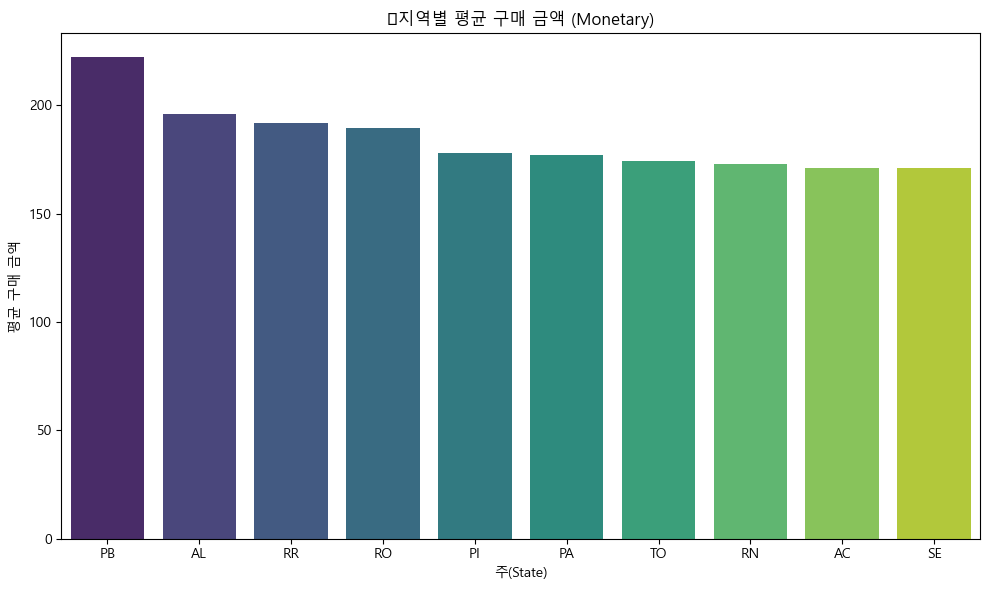

In [ ]:
# 지역별 Monetary 평균 상위 10개

top_states = region_rfm_avg.sort_values('Monetary', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(data=top_states, x='customer_state', y='Monetary', palette='viridis')
plt.title('📍지역별 평균 구매 금액 (Monetary)')
plt.xlabel('주(State)')
plt.ylabel('평균 구매 금액')
plt.tight_layout()
plt.show()

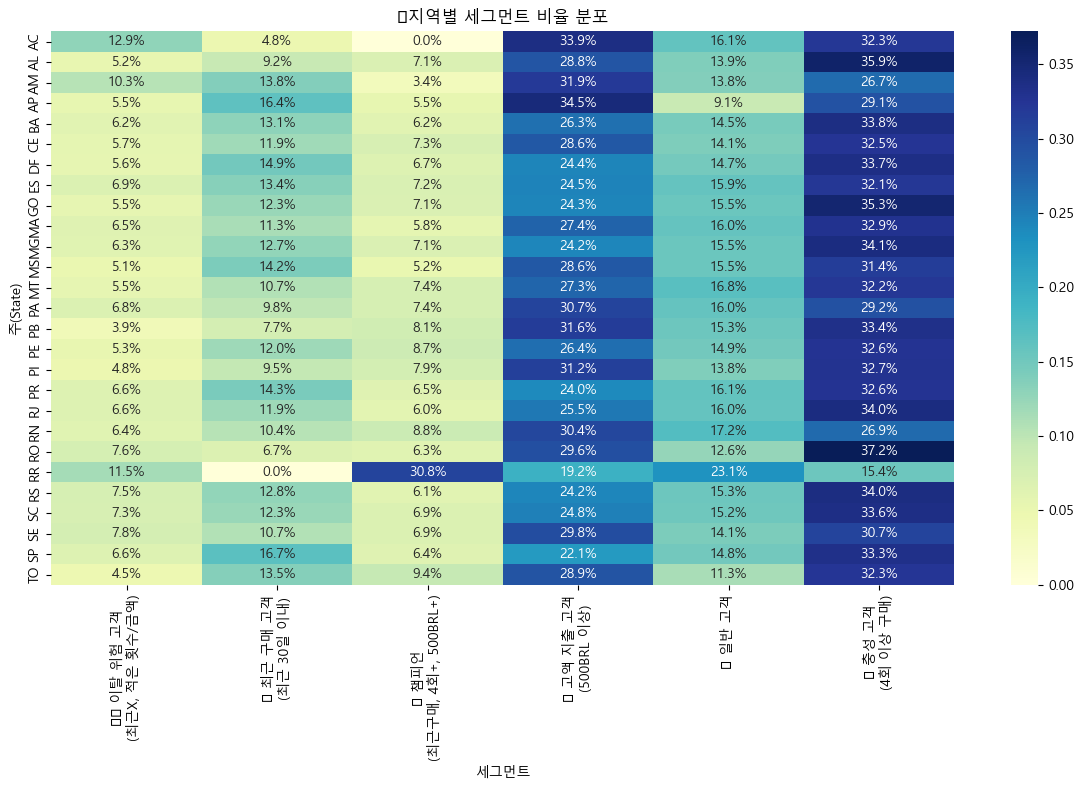

In [ ]:
# 지역별 세그먼트 비율 Heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(region_segment_ratio, cmap='YlGnBu', annot=True, fmt='.1%', cbar=True)
plt.title('📍지역별 세그먼트 비율 분포')
plt.xlabel('세그먼트')
plt.ylabel('주(State)')
plt.tight_layout()
plt.show()

In [23]:
from datetime import datetime

# 첫 구매 시점 추출
first_purchase = orders.groupby('customer_id')['order_purchase_timestamp'].min().reset_index()
first_purchase.columns = ['customer_id', 'first_purchase_date']

# 병합 후 고객 생애 기간 계산
rfm_region = pd.merge(rfm_region, first_purchase, on='customer_id', how='left')
rfm_region['first_purchase_date'] = pd.to_datetime(rfm_region['first_purchase_date'])
rfm_region['customer_lifetime'] = (datetime(2018, 9, 1) - rfm_region['first_purchase_date']).dt.days

# 생애주기 기준 구간화 (예: 초기 <90일, 중기 <365일, 장기 >365일)
def lifecycle_stage(days):
    if days < 90:
        return '초기 고객'
    elif days < 365:
        return '성장 고객'
    else:
        return '장기 고객'

rfm_region['생애주기'] = rfm_region['customer_lifetime'].apply(lifecycle_stage)

| 🎯 세그먼트       | 💡 주요 특성          | 🧬 생애 주기 추정  | 💼 맞춤 전략 예시                     |
| ------------- | ----------------- | ------------ | ------------------------------- |
| **VIP 충성 고객** | 높은 F, M, 짧은 R     | 장기 & 활발      | 우선 배송, 전용 핫딜, 리뷰 유도 보상, 추천 리워드  |
| **신규 고액 고객**  | 낮은 F, 높은 M, 짧은 R  | 초기 단계        | 가입 후 첫 고액 구매 → 재구매 유도 쿠폰, 웰컴 혜택 |
| **빈번 저가 고객**  | 높은 F, 낮은 M        | 잦은 구매, 단가 낮음 | 묶음 할인, 상향판매(업셀링), 추천상품 제안       |
| **이탈 가능 고객**  | 낮은 F, 중간 M, R 길어짐 | 중단 위기        | 리마인드 메시지, 개인화 상품 큐레이션, 긴급 혜택    |
| **재활성화 대상**   | 높은 R, 낮은 F, 낮은 M  | 이탈 후 장기 공백   | “우리가 그리워요” 캠페인, 복귀 할인           |
| **지역 잠재 고객**  | 특정 지역 내 평균 RFM 상위 | 성장 가능        | 지역 특화 캠페인, 현지 배송 강화, SNS 타겟 광고  |


In [36]:
# 세그먼트 별 인원수 포함 Data

# 정제된 RFM 데이터 불러오기
rfm = pd.read_csv("rfm_with_region.csv")

# 세그먼트 한글명 기준 인원수 확인
segment_counts = rfm["세그먼트(한글)"].value_counts().reset_index()
segment_counts.columns = ["세그먼트(한글)", "고객 수"]

# 전략표 병합
strategy_table = pd.DataFrame({
    "세그먼트(한글)": [
        "⭐ 핵심 고객",
        "🆕 신규 유망 고객",
        "🔄 재활성 고객",
        "🧊 이탈 우려 고객",
        "📦 일반 고객",
        "❗ 위험 고객"
    ],
    "세그먼트 조건 요약": [
        "짧은 R + 높은 F + 높은 M",
        "짧은 R + 낮은 F + 낮은 M",
        "짧은 R + 낮은 F + 높은 M",
        "긴 R + 높은 F + 높은 M",
        "중간 수준 RFM",
        "긴 R + 낮은 F + 낮은 M"
    ],
    "추천 전략": [
        "로열티 프로그램, VIP 이벤트, 제품 리뷰 유도",
        "웰컴 메시지, 재구매 유도 할인 제공",
        "신제품 체험 제공, 리텐션 프로모션",
        "리마인드 메시지, 리타겟팅 광고 캠페인",
        "관심 제품 추천, 뉴스레터 구독 유도",
        "휴면 고객 케어 캠페인, 강력한 재유입 프로모션"
    ]
})

# 인원수 정보 병합
detailed_segment_table = pd.merge(strategy_table, segment_counts, on="세그먼트(한글)", how="left")
detailed_segment_table = detailed_segment_table.fillna(0)  # 혹시 빠진 세그먼트가 있으면 0으로 처리

# 보기 좋게 출력
import pandas as pd
import IPython.display as disp
disp.display(detailed_segment_table)

,세그먼트(한글),세그먼트 조건 요약,추천 전략,고객 수
0,⭐ 핵심 고객,짧은 R + 높은 F + 높은 M,"로열티 프로그램, VIP 이벤트, 제품 리뷰 유도",0.0
1,🆕 신규 유망 고객,짧은 R + 낮은 F + 낮은 M,"웰컴 메시지, 재구매 유도 할인 제공",0.0
2,🔄 재활성 고객,짧은 R + 낮은 F + 높은 M,"신제품 체험 제공, 리텐션 프로모션",0.0
3,🧊 이탈 우려 고객,긴 R + 높은 F + 높은 M,"리마인드 메시지, 리타겟팅 광고 캠페인",0.0
4,📦 일반 고객,중간 수준 RFM,"관심 제품 추천, 뉴스레터 구독 유도",14244.0
5,❗ 위험 고객,긴 R + 낮은 F + 낮은 M,"휴면 고객 케어 캠페인, 강력한 재유입 프로모션",0.0


✅ RFM 구성 요소 의미
R (Recency)    최근 구매 시점으로부터 얼마나 시간이 지났는가? → 짧을수록 최근 구매    R=1 (가장 최근), R=5 (오래 전)
F (Frequency)  얼마나 자주 구매했는가? → 높을수록 자주 구매                        F=5 (많이 구매), F=1 (한두 번)
M (Monetary)   총 구매 금액은 얼마인가? → 높을수록 많이 지출                       M=5 (큰 금액), M=1 (소액만 지출)

🔍 개선된 전략 분류 기준 예시
짧은 R	        고객이 최근에 구매한 기록이 있음 → 현재 관심이 있음	     최근 7일 내 주문한 고객
높은 F	        고객이 구매 빈도가 높음 → 충성도 있음	               최근 6개월 내 5회 이상 구매
높은 M	        고객이 총 구매 금액이 높음 → 고객 가치 큼	           총 구매 금액이 500,000원 이상
긴 R	        마지막 구매가 오래됨 → 이탈 위험 있음	               마지막 구매가 90일 전
낮은 F	        자주 구매하지 않음 → 관심도 낮음 or 신규일 수 있음	     최근 6개월 내 1회 구매
낮은 M	        지출 금액 적음 → 잠재력이 낮거나 테스트 구매	         누적 구매 금액 20,000원 이하

💼 전략에 활용되는 방식 예시
⭐️ 핵심고객	   짧은 R + 높은 F + 높은 M	  멤버십 혜택 제공, 맞춤형 리워드, 리뷰 유도
🆕 신규유망	   짧은 R + 낮은 F + 낮은 M	  첫 구매 후 만족도 설문, 크로스셀링 제안
⚠️ 이탈위험	   긴 R + 높은 F	             이탈 방지 리마인드 메시지, 쿠폰 제공
📦 일반고객	   평균적 R/F/M	             관심 유도 콘텐츠 제공, 추천 상품 알림

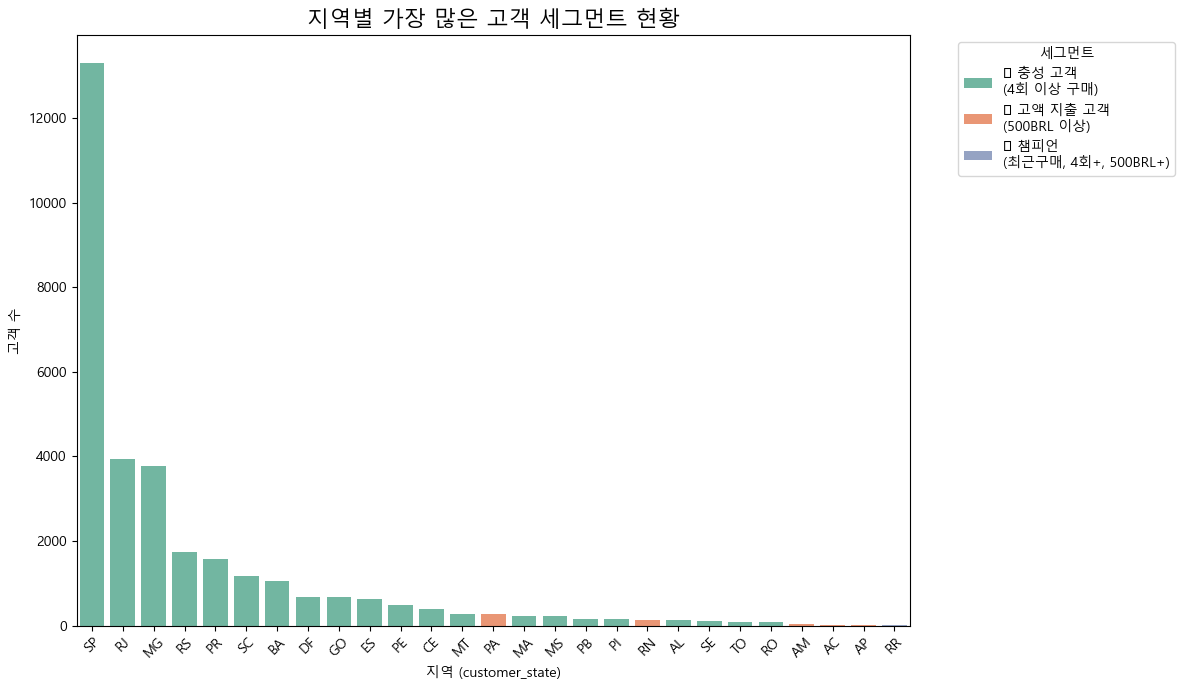

In [ ]:
# 지역 별 가장 많은 세그먼트 현황 확인

# 데이터 불러오기
df = pd.read_csv("rfm_with_region.csv")

# 지역별 주요 세그먼트(가장 많은 세그먼트) 추출
top_segments = df.groupby("customer_state")["세그먼트(한글)"] \
                 .agg(lambda x: x.value_counts().index[0]) \
                 .reset_index(name="가장 많은 세그먼트")

# 각 지역에서 주요 세그먼트의 수량도 같이 보기 위해 merge
segment_counts = df.groupby(["customer_state", "세그먼트(한글)"]).size().reset_index(name="count")
top_segments = top_segments.merge(segment_counts, how="left",
                                  left_on=["customer_state", "가장 많은 세그먼트"],
                                  right_on=["customer_state", "세그먼트(한글)"])

# 시각화
plt.figure(figsize=(12, 7))
sns.barplot(data=top_segments.sort_values("count", ascending=False),
            x="customer_state", y="count", hue="가장 많은 세그먼트", dodge=False, palette="Set2")

plt.title("지역별 가장 많은 고객 세그먼트 현황", fontsize=16)
plt.xlabel("지역 (customer_state)")
plt.ylabel("고객 수")
plt.xticks(rotation=45)
plt.legend(title="세그먼트", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

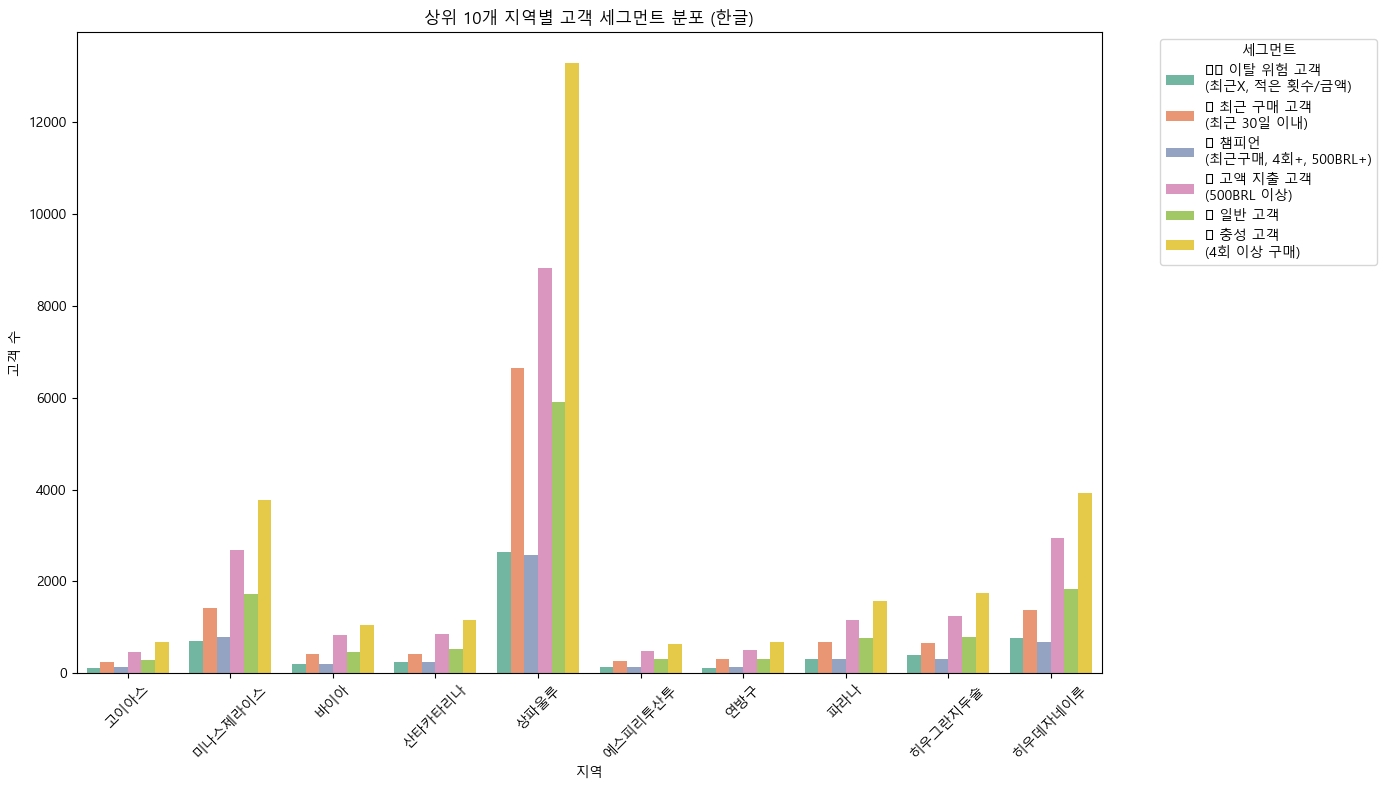

In [ ]:
# 10대 지역 별 세그먼트 현황 확인핑

# 지역 코드와 한글 도시명 매핑
state_to_korean = {
    "AC": "아크리", "AL": "알라고아스", "AM": "아마조나스", "AP": "아마파", "BA": "바이아",
    "CE": "세아라", "DF": "연방구", "ES": "에스피리투산투", "GO": "고이아스", "MA": "마라냥",
    "MG": "미나스제라이스", "MS": "마투그로수두술", "MT": "마투그로수", "PA": "파라", "PB": "파라이바",
    "PE": "페르남부쿠", "PI": "피아우이", "PR": "파라나", "RJ": "히우데자네이루", "RN": "히우그란지두노르치",
    "RO": "히우브랑쿠", "RR": "호라이마", "RS": "히우그란지두술", "SC": "산타카타리나", "SE": "세르지피",
    "SP": "상파울루", "TO": "토칸칭스"
}

# 한글 도시 컬럼 생성
df_top['지역(한글)'] = df_top['customer_state'].map(state_to_korean)

# 그룹화 후 다시 시각화
seg_region_counts = df_top.groupby(['지역(한글)', '세그먼트(한글)']).size().reset_index(name='고객 수')

plt.figure(figsize=(14, 8))
sns.barplot(data=seg_region_counts, x='지역(한글)', y='고객 수', hue='세그먼트(한글)', palette='Set2')
plt.title("상위 10개 지역별 고객 세그먼트 분포 (한글)")
plt.xlabel("지역")
plt.ylabel("고객 수")
plt.xticks(rotation=45)
plt.legend(title='세그먼트', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()